In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [5]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by((measurement.date).desc()).first()[0]

recent_date

'2017-08-23'

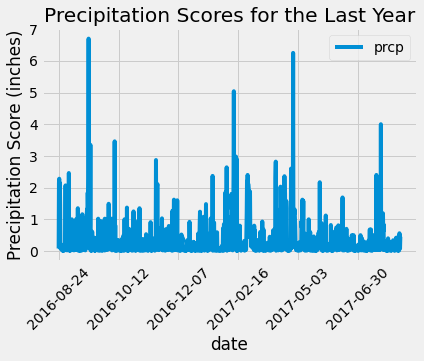

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year_precip = session.query(measurement.date, measurement.prcp).order_by((measurement.date).asc()).filter(measurement.date >= one_year_ago).filter(measurement.prcp).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_precip_df = pd.DataFrame(last_year_precip)
last_year_precip_df.set_index("date", inplace=True)

# Sort the dataframe by date
last_year_precip_df.sort_values(by=["date"], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
last_year_precip_df.plot()
plt.title("Precipitation Scores for the Last Year")
plt.ylabel("Precipitation Score (inches)")
plt.xticks(rotation=45)
plt.show()

In [10]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_precip_df.describe()

,prcp
count,1142.000000
mean,0.311357
std,0.576134
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number stations in the dataset
number_of_stations = session.query(measurement.station).group_by(measurement.station).count()

number_of_stations

9

In [12]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]

station_stats = session.query(measurement.station, func.min(measurement.tobs), 
    func.max(measurement.tobs),
    func.avg(measurement.tobs)).filter(measurement.station == most_active_station).all()[0]
print(f"Station ID: {station_stats[0]}")
print(f"Low: {round(station_stats[1], 1)}")
print(f"High: {round(station_stats[2], 1)}")
print(f"Average: {round(station_stats[3], 1)}")

Station ID: USC00519281
Low: 54.0
High: 85.0
Average: 71.7


In [14]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data_past_12_months = session.query(measurement.station, measurement.tobs).filter(measurement.station==most_active_station).\
    order_by((measurement.date).asc()).filter(measurement.date > one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
past_year_temp_station = pd.DataFrame(temp_data_past_12_months)
past_year_temp_station.set_index('station', inplace=True)

past_year_temp_station.head()

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


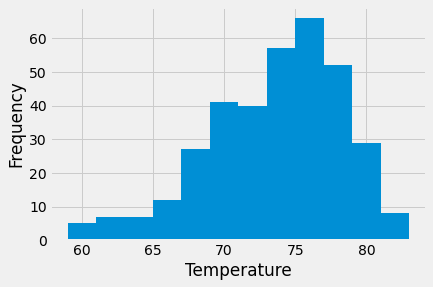

In [15]:
# Plot data in a histogram
plt.hist(past_year_temp_station["tobs"], 12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show()

# Close session

In [16]:
# Close Session
session.close()